🎯 Desafio dia 67 — Previsão de Preços de Imóveis

📂 Dataset: desafio_dia_67_precos_imoveis.csv
📥 Clique aqui para baixar o CSV

🔍 Contexto:
Você recebeu um dataset contendo informações sobre imóveis em São Paulo, como bairro, metragem, quantidade de quartos, banheiros, vagas e o preço em milhares de reais. Seu objetivo é preparar os dados e construir um modelo simples de regressão para prever o preço dos imóveis com base nas características disponíveis.

🛠️ Tarefas do desafio:

Tratamento de dados
- Verifique e trate os valores ausentes nas colunas area_m2 e preco_mil_reais utilizando o preenchimento com a mediana.

Análise geral
- Calcule a média de preço por bairro.

- Identifique qual bairro possui o maior preço médio por metro quadrado (preco_mil_reais / area_m2).

Visualização de dados
- Crie um gráfico de barras mostrando o preço médio dos imóveis por quantidade de quartos.

Machine Learning - Regressão
- Crie um modelo de regressão linear para prever o preco_mil_reais a partir das colunas:
area_m2, quartos, banheiros, vaga_garagem.

- Utilize train_test_split e avalie o modelo com mean_squared_error.

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

In [2]:
df = pd.read_csv("desafio_dia_67_precos_imoveis.csv")
df.head()

,id,bairro,area_m2,quartos,banheiros,vaga_garagem,preco_mil_reais
0,1,Tatuapé,83.3,2,2,1,311.31
1,2,Vila Mariana,36.2,1,3,1,178.53
2,3,Pinheiros,81.2,2,3,1,215.13
3,4,Pinheiros,68.1,2,2,0,255.19
4,5,Tatuapé,114.9,2,1,1,354.37


In [6]:
#Verifique e trate os valores ausentes nas colunas area_m2 e preco_mil_reais utilizando o preenchimento com a mediana.
df["area_m2"] = df["area_m2"].fillna(df["area_m2"].median())

df["preco_mil_reais"] = df["preco_mil_reais"].fillna(
    df.groupby("bairro")["preco_mil_reais"].transform("median")
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               300 non-null    int64  
 1   bairro           300 non-null    object 
 2   area_m2          300 non-null    float64
 3   quartos          300 non-null    int64  
 4   banheiros        300 non-null    int64  
 5   vaga_garagem     300 non-null    int64  
 6   preco_mil_reais  300 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 16.5+ KB


In [9]:
#Calcule a média de preço por bairro.
media_bairro = df.groupby("bairro")["preco_mil_reais"].mean().sort_values(ascending=False)
print(media_bairro)

bairro
Pinheiros       267.610893
Vila Mariana    266.689857
Itaim Bibi      264.136842
Tatuapé         257.457203
Moema           238.206552
Name: preco_mil_reais, dtype: float64


In [11]:
#Identifique qual bairro possui o maior preço médio por metro quadrado (preco_mil_reais / area_m2).
df["preco_m2"] = df["preco_mil_reais"] / df["area_m2"]
bairro_preco_m2 = df.groupby("bairro")["preco_m2"].mean().sort_values(ascending=False)
print(bairro_preco_m2)

bairro
Pinheiros       4.152044
Moema           3.893363
Tatuapé         3.775280
Itaim Bibi      3.767708
Vila Mariana    3.715813
Name: preco_m2, dtype: float64


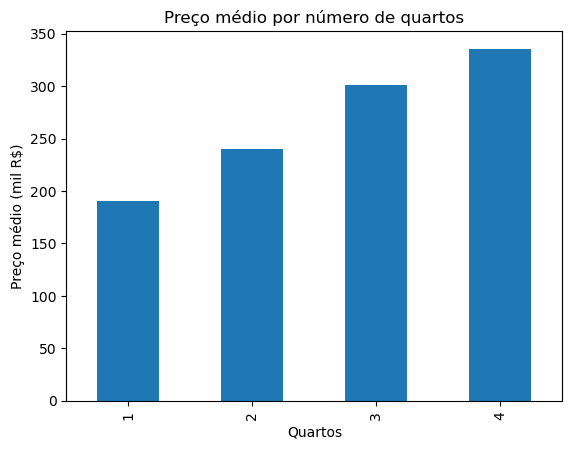

In [17]:
#Crie um gráfico de barras mostrando o preço médio dos imóveis por quantidade de quartos.
quartos_preco = df.groupby("quartos")["preco_mil_reais"].mean()
quartos_preco.plot(kind="bar")
plt.title("Preço médio por número de quartos")
plt.ylabel("Preço médio (mil R$)")
plt.xlabel("Quartos")
plt.show()

In [26]:
#Crie um modelo de regressão linear para prever o preco_mil_reais a partir das colunas: area_m2, quartos, banheiros, vaga_garagem.

X = df.drop(["preco_mil_reais", "bairro", "id"], axis=1)
y = df["preco_mil_reais"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print(mean_squared_error(y_test, y_pred))

4322.835455440961
